In [17]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv("/content/VLagun_Phys_Years3.csv")
X = df.iloc[:,0:8].values
Y = df.iloc[:,8].values

In [9]:
seed = 7
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (96, 8)
Shape of X_test:  (24, 8)


In [7]:
def confusion_mat(Y_pred,Y_test):
  plt.figure()
  sns.set(font_scale=1.5)
  cm = confusion_matrix(Y_test, Y_pred)
  sns.heatmap(cm, annot=True, fmt='g')
  plt.title('Confusion matrix',y = 1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()

AdaBoost

Accuracy of the result is:


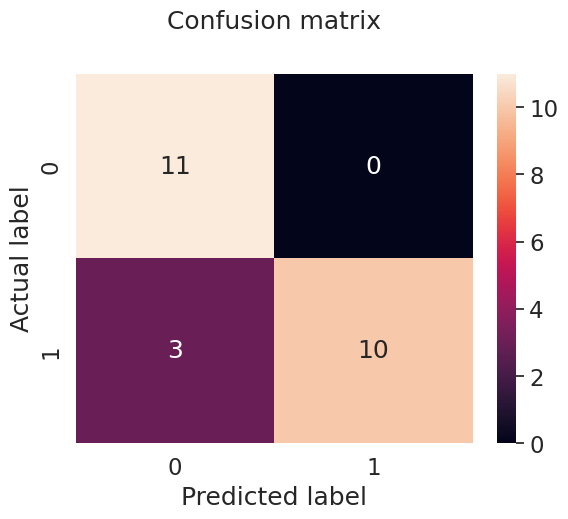

0.875


In [10]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100,random_state=1)
clf.fit(X_train, Y_train)
predicted=clf.predict(X_test)
Y_pred = clf.predict(X_test)
print('Accuracy of the result is:')
confusion_mat(Y_pred, Y_test)
print(np.mean(predicted==Y_test))

Gradient Boosting Machine

Accuracy of the result is:
0.7083333333333334


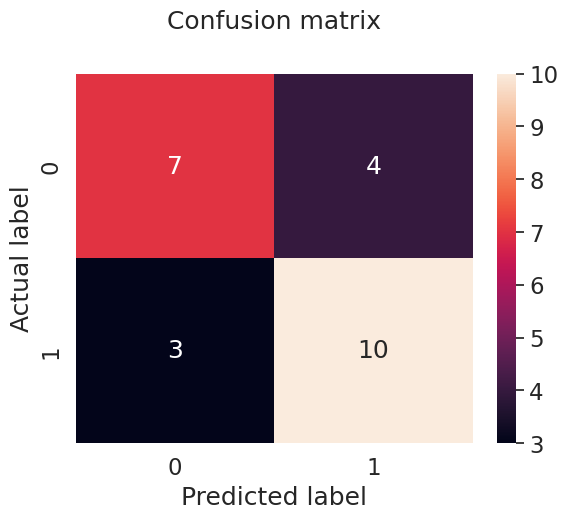

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, Y_train)
predicted=clf.predict(X_test)
Y_pred = clf.predict(X_test)
print('Accuracy of the result is:')
print(np.mean(predicted==Y_test))
confusion_mat(Y_pred, Y_test)

XGBoost

Accuracy of the result is:
0.8333333333333334


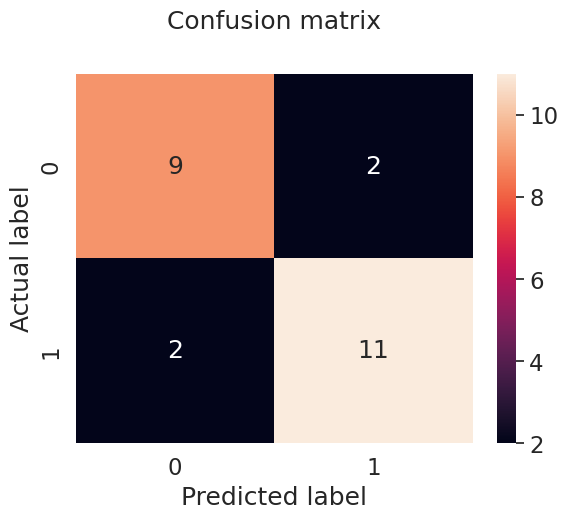

In [12]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, Y_train)
predicted=clf.predict(X_test)
Y_pred = clf.predict(X_test)
print('Accuracy of the result is:')
print(np.mean(predicted==Y_test))
confusion_mat(Y_pred, Y_test)

LightGBM

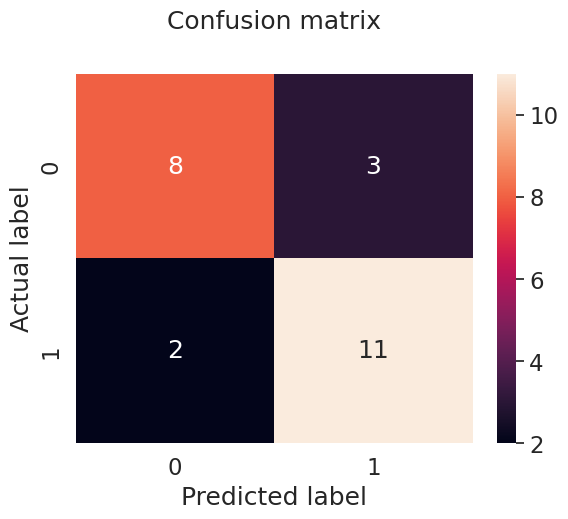

Accuracy of the result is:
0.7916666666666666


In [19]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(verbose=-1)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
confusion_mat(Y_pred, Y_test)

predicted=clf.predict(X_test)
print('Accuracy of the result is:')
print(np.mean(predicted==Y_test))

Cat Boost

Learning rate set to 0.031287
0:	learn: 0.6824059	total: 1.87ms	remaining: 186ms
1:	learn: 0.6743449	total: 3.73ms	remaining: 183ms
2:	learn: 0.6665073	total: 5.38ms	remaining: 174ms
3:	learn: 0.6584623	total: 7.35ms	remaining: 176ms
4:	learn: 0.6494479	total: 8.93ms	remaining: 170ms
5:	learn: 0.6424623	total: 9.59ms	remaining: 150ms
6:	learn: 0.6328425	total: 10.2ms	remaining: 136ms
7:	learn: 0.6241480	total: 13.3ms	remaining: 154ms
8:	learn: 0.6170498	total: 14.1ms	remaining: 142ms
9:	learn: 0.6087089	total: 14.7ms	remaining: 133ms
10:	learn: 0.6035711	total: 15.4ms	remaining: 125ms
11:	learn: 0.5969439	total: 16.1ms	remaining: 118ms
12:	learn: 0.5882663	total: 16.8ms	remaining: 112ms
13:	learn: 0.5824214	total: 22.1ms	remaining: 136ms
14:	learn: 0.5753882	total: 22.9ms	remaining: 130ms
15:	learn: 0.5667717	total: 23.6ms	remaining: 124ms
16:	learn: 0.5606056	total: 24.3ms	remaining: 119ms
17:	learn: 0.5540462	total: 25.1ms	remaining: 114ms
18:	learn: 0.5489253	total: 25.7ms	remaining

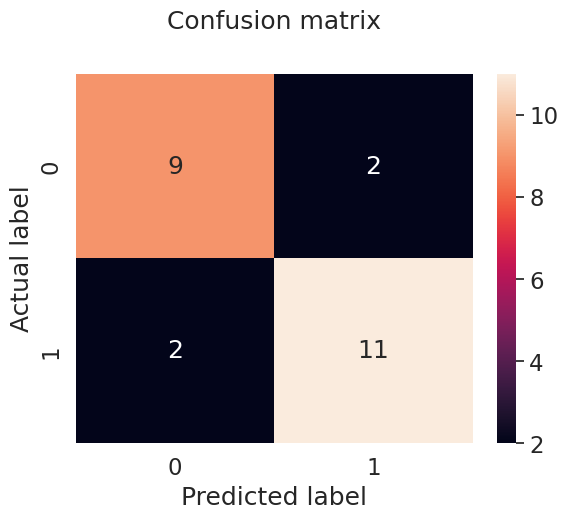

Accuracy of the result is:
0.8333333333333334


In [21]:
from catboost import CatBoostClassifier
clf=CatBoostClassifier(iterations=100)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
confusion_mat(Y_pred, Y_test)

predicted=clf.predict(X_test)
print('Accuracy of the result is:')
print(np.mean(predicted==Y_test))